<a href="https://colab.research.google.com/github/ctarrington/try-python/blob/master/bawp/ch02/coins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4

     |████████████████████████████████| 1.4MB 2.9MB/s 
  Found existing installation: arviz 0.9.0
    Uninstalling arviz-0.9.0:
      Successfully uninstalled arviz-0.9.0
     |████████████████████████████████| 911kB 2.8MB/s 
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7


In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pymc3 as pm
import arviz as az


In [3]:
print('pymc3', pm.__version__)

pymc3 3.8


In [4]:
az.style.use('arviz-darkgrid')
%matplotlib inline


In [5]:

np.random.seed(123)
theta_real = 0.35 # unknown value in a real experiment
trial_counts = [10,100,1000,10000]

10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 1976.83it/s]


    mean     sd  hpd_3%  hpd_97%  ...  ess_sd  ess_bulk  ess_tail  r_hat
θ  0.248  0.121   0.053    0.476  ...   970.0     919.0    1145.0    1.0

[1 rows x 11 columns]
100


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 2031.90it/s]


    mean     sd  hpd_3%  hpd_97%  ...  ess_sd  ess_bulk  ess_tail  r_hat
θ  0.342  0.045   0.265    0.434  ...   808.0     806.0    1367.0    1.0

[1 rows x 11 columns]
1000


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 1783.17it/s]


    mean     sd  hpd_3%  hpd_97%  ...  ess_sd  ess_bulk  ess_tail  r_hat
θ  0.371  0.015   0.345    0.403  ...   840.0     840.0    1407.0    1.0

[1 rows x 11 columns]
10000


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:01<00:00, 803.71it/s]


    mean     sd  hpd_3%  hpd_97%  ...  ess_sd  ess_bulk  ess_tail  r_hat
θ  0.349  0.005    0.34    0.358  ...   855.0     853.0    1461.0    1.0

[1 rows x 11 columns]


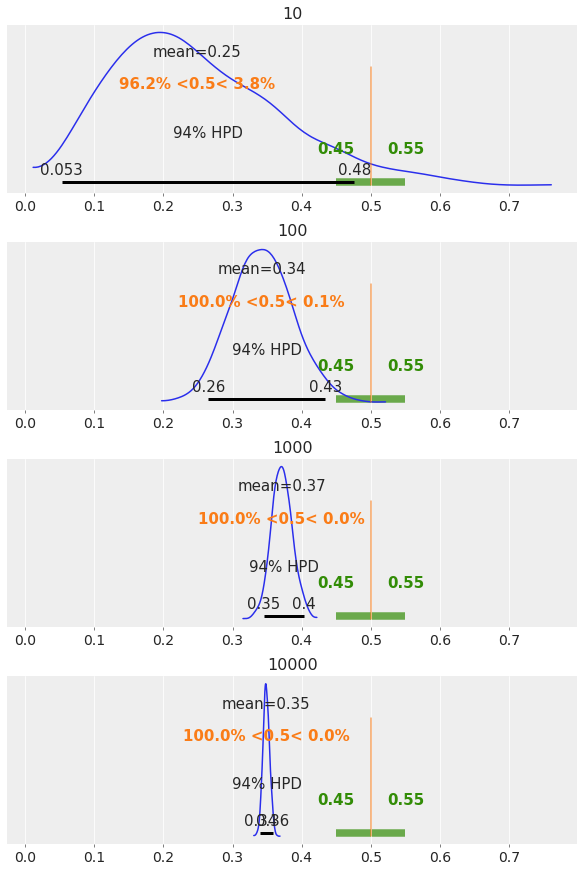

In [9]:
_,ax = plt.subplots(len(trial_counts), 1, sharex=True, sharey=False,
                    figsize=(8, 12), constrained_layout=True)

for trial_index in range(len(trial_counts)):
    trial_count = trial_counts[trial_index]
    print(trial_count)
    data = stats.bernoulli.rvs(p=theta_real, size=trial_count)
    with pm.Model() as our_first_model:
        # a priori - uniform
        θ = pm.Beta('θ', alpha=1., beta=1.)
        # likelihood p(y|θ)
        y = pm.Bernoulli('y', p=θ, observed=data)
        trace = pm.sample(1000, random_seed=123)
        
    df = az.summary(trace)
    print(df)
    ref_value = 0.5
    az.plot_posterior(trace, rope=[0.45, 0.55], ref_val=ref_value, ax = ax[trial_index])
    ax[trial_index].set_title(trial_count)
        


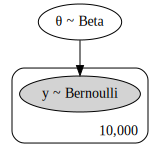

In [7]:
    pm.model_to_graphviz(our_first_model)
